In [1]:
import pandas as pd

In [2]:
meta = pd.read_csv('../data/train_metadata.csv')

/home/eric/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,9,17,18,20,22,50,72,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
meta.columns

Index(['Unnamed: 0', 'AccessionNumber', 'AcquisitionMatrix', 'B1rms',
       'BitsAllocated', 'BitsStored', 'Columns', 'ConversionType',
       'DiffusionBValue', 'DiffusionGradientOrientation', 'EchoNumbers',
       'EchoTime', 'EchoTrainLength', 'FlipAngle', 'HighBit', 'HighRRValue',
       'ImageDimensions', 'ImageFormat', 'ImageGeometryType', 'ImageLocation',
       'ImageOrientation', 'ImageOrientationPatient', 'ImagePosition',
       'ImagePositionPatient', 'ImageType', 'ImagedNucleus',
       'ImagingFrequency', 'InPlanePhaseEncodingDirection',
       'InStackPositionNumber', 'InstanceNumber', 'InversionTime',
       'Laterality', 'LowRRValue', 'MRAcquisitionType',
       'MagneticFieldStrength', 'Modality', 'NumberOfAverages',
       'NumberOfPhaseEncodingSteps', 'PatientID', 'PatientName',
       'PatientPosition', 'PercentPhaseFieldOfView', 'PercentSampling',
       'PhotometricInterpretation', 'PixelBandwidth', 'PixelPaddingValue',
       'PixelRepresentation', 'PixelSpacing

In [10]:
# the following columns are always empty
na_columms = meta.columns[meta.isna().all()]
na_columns

Index(['B1rms', 'EchoTime', 'InversionTime', 'Laterality',
       'PositionReferenceIndicator', 'FileMetaInformationGroupLength',
       'FileMetaInformationVersion', 'ImplementationClassUID',
       'ImplementationVersionName', 'MediaStorageSOPClassUID',
       'MediaStorageSOPInstanceUID', 'SourceApplicationEntityTitle'],
      dtype='object')

In [22]:
# these columns have a constant value
# if a series has nan and non-nan values, count as 2 unique values
constant_columns = meta.columns[(meta.nunique(dropna=False) <= 1) & ~meta.isna().all()]
constant_columns

Index(['BitsAllocated', 'BitsStored', 'HighBit', 'ImageType', 'Modality',
       'PatientPosition', 'PhotometricInterpretation', 'RescaleIntercept',
       'RescaleSlope', 'RescaleType', 'SOPClassUID', 'SamplesPerPixel',
       'SpacingBetweenSlices', 'TransferSyntaxUID', 'is_original_encoding',
       'is_implicit_VR', 'is_little_endian'],
      dtype='object')

In [23]:
# show the constant value of the constant columns
meta[constant_columns].drop_duplicates()

,BitsAllocated,BitsStored,HighBit,ImageType,Modality,PatientPosition,PhotometricInterpretation,RescaleIntercept,RescaleSlope,RescaleType,SOPClassUID,SamplesPerPixel,SpacingBetweenSlices,TransferSyntaxUID,is_original_encoding,is_implicit_VR,is_little_endian
0,16,16,15,"['DERIVED', 'SECONDARY']",MR,HFS,MONOCHROME2,0.0,1.0,US,1.2.840.10008.5.1.4.1.1.4,1,1.0,1.2.840.10008.1.2,True,True,True


In [26]:
meta.AcquisitionMatrix.value_counts()

[0, 256, 256, 0]    212190
[0, 256, 192, 0]     77378
[0, 288, 288, 0]     15363
[0, 256, 208, 0]     10894
[0, 320, 224, 0]      4727
                     ...  
[0, 384, 256, 0]        20
[0, 512, 126, 0]        20
[0, 512, 150, 0]        20
[0, 512, 112, 0]        20
[0, 512, 98, 0]         20
Name: AcquisitionMatrix, Length: 111, dtype: int64

In [29]:
# image dimensions vary across a wide spectrum of combinations...
pd.crosstab(meta.Rows, meta.Columns)

Columns,192,204,208,216,224,232,236,240,244,250,...,432,440,448,464,480,512,640,672,768,1014
Rows,,,,,,,,,,,,,,,,,,,,,
232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240,0,0,0,0,0,0,0,75,0,0,...,0,0,0,0,0,0,0,0,0,0
244,0,0,0,0,0,0,0,0,320,0,...,0,0,0,0,0,0,0,0,0,0
256,69350,60,10841,28,740,1408,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320,0,0,0,0,0,0,34,166,0,64,...,0,0,0,0,0,0,0,0,0,0
384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,0,0,0,0,0,0,0,0,0,0,...,0,560,0,0,0,0,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,966,0,0,144,0,0,0,0
480,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,358,0,0,0,0,0


In [33]:
meta.ConversionType.value_counts()

WSD    1214
Name: ConversionType, dtype: int64

In [34]:
meta[meta.ConversionType == 'WSD']

,Unnamed: 0,AccessionNumber,AcquisitionMatrix,B1rms,BitsAllocated,BitsStored,Columns,ConversionType,DiffusionBValue,DiffusionGradientOrientation,...,FileMetaInformationVersion,ImplementationClassUID,ImplementationVersionName,MediaStorageSOPClassUID,MediaStorageSOPInstanceUID,SourceApplicationEntityTitle,is_original_encoding,is_implicit_VR,is_little_endian,timestamp
57402,57402,157,NaN,NaN,16,16,192,WSD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,1.624956e+09
57403,57403,157,NaN,NaN,16,16,192,WSD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,1.624956e+09
57404,57404,157,NaN,NaN,16,16,192,WSD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,1.624956e+09
57405,57405,157,NaN,NaN,16,16,192,WSD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,1.624956e+09
57406,57406,157,NaN,NaN,16,16,192,WSD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,1.624956e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344057,344057,839,NaN,NaN,16,16,192,WSD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,1.624961e+09
344058,344058,839,NaN,NaN,16,16,192,WSD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,1.624961e+09
344059,344059,839,NaN,NaN,16,16,192,WSD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,1.624961e+09
344060,344060,839,NaN,NaN,16,16,192,WSD,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,1.624961e+09


In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

meta.iloc[0]

Unnamed: 0                                                                        0
AccessionNumber                                                                   0
AcquisitionMatrix                                                  [0, 256, 256, 0]
B1rms                                                                           NaN
BitsAllocated                                                                    16
BitsStored                                                                       16
Columns                                                                         512
ConversionType                                                                  NaN
DiffusionBValue                                                                 NaN
DiffusionGradientOrientation                                                    NaN
EchoNumbers                                                                       1
EchoTime                                                                    

In [42]:
meta.SeriesNumber.nunique()

102

In [43]:
meta.AccessionNumber.nunique()

585

In [53]:
# find num series per patient... should be 4 (FLAIR, T1w, etc...)
# display patients with fewer than 4 series (i.e. missing at least 1)
num_series = meta[['SeriesNumber', 'AccessionNumber']].drop_duplicates().groupby('AccessionNumber').count().reset_index()
num_series[num_series.SeriesNumber != 4]

,AccessionNumber,SeriesNumber
340,504,3
370,545,3
484,705,3
499,730,3
574,999,1
577,1002,1
578,1003,2
579,1004,3
580,1005,1
581,1007,1


### SeriesNumber

In [61]:
# confusingly, in rare cases the same series number corresponds to different series types for a patient
# only happens in ~10 patients! 
# so we can't consider this column as a series ID
for patient_id in num_series[num_series.SeriesNumber != 4].AccessionNumber:
    print('PATIENT:', patient_id)
    print(pd.crosstab(meta[meta.AccessionNumber == patient_id].SeriesDescription,
                      meta[meta.AccessionNumber == patient_id].SeriesNumber))
    print()

PATIENT: 504
SeriesNumber        4    5    10
SeriesDescription               
FLAIR              216    0    0
T1w                  0    0  392
T1wCE                0  216    0
T2w                  0  416    0

PATIENT: 545
SeriesNumber        3    4    13
SeriesDescription               
FLAIR              208    0    0
T1w                352    0    0
T1wCE                0    0  352
T2w                  0  208    0

PATIENT: 705
SeriesNumber        3    5    10
SeriesDescription               
FLAIR              392    0    0
T1w                  0    0  120
T1wCE                0  304    0
T2w                  0  408    0

PATIENT: 730
SeriesNumber        5    7    11
SeriesDescription               
FLAIR              412    0    0
T1w                  0   23    0
T1wCE                0    0  352
T2w                  0  408    0

PATIENT: 999
SeriesNumber        5
SeriesDescription    
FLAIR              24
T1w                24
T1wCE              24
T2w                24

PATIEN

### ConversionType

In [68]:
# see http://dicom.nema.org/medical/dicom/current/output/chtml/part03/sect_C.8.6.html
meta.ConversionType.value_counts(dropna=False)

NaN    347427
WSD      1214
Name: ConversionType, dtype: int64

### DiffusionBValue

In [70]:
# see http://mriquestions.com/what-is-the-b-value.html
# tldr constant that effects the look of the imagery
# often not recorded in this dataset, but likely varies depending on series type
meta.DiffusionBValue.value_counts(dropna=False)

NaN    346703
0.0      1938
Name: DiffusionBValue, dtype: int64

### DiffusionGradientOrientation

In [71]:
# see https://dicom.innolitics.com/ciods/enhanced-mr-color-image/enhanced-mr-color-image-multi-frame-functional-groups/52009229/00189117/00189076/00189089
meta.DiffusionGradientOrientation.value_counts(dropna=False)

NaN                346809
[0.0, 0.0, 0.0]      1832
Name: DiffusionGradientOrientation, dtype: int64

### EchoNumber

In [73]:
# affects the image slightly
# i don't think 0 makes sense (all MRIs are echos essentially)
# probably can just ignore the fact that some have 2?
meta.EchoNumbers.value_counts(dropna=True)

1.0    345521
0.0       350
2.0       296
Name: EchoNumbers, dtype: int64

In [75]:
# occasionally a patient will have a single series with echo number = 2
meta[meta.EchoNumbers == 2].AccessionNumber.value_counts()

132    56
120    54
137    50
147    36
143    36
107    24
148    20
108    20
Name: AccessionNumber, dtype: int64

### EchoTrainLength

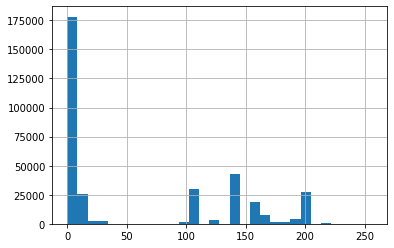

In [83]:
# affects the image greatly
# Likely the ~4 bumps correspond to different series types
# http://mriquestions.com/fse-parameters.html
meta.EchoTrainLength.hist(bins=30)

### FlipAngle

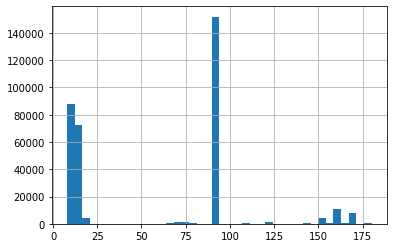

In [90]:
# http://mriquestions.com/what-is-flip-angle.html
# strongly peaked at 12-15 and 90
meta.FlipAngle.hist(bins=40)

### RRValue

In [93]:
meta.HighRRValue.value_counts(dropna=False)

NaN    346583
0.0      2058
Name: HighRRValue, dtype: int64

In [194]:
meta.LowRRValue.value_counts(dropna=False)

NaN    346583
0.0      2058
Name: LowRRValue, dtype: int64

### Orientation, location, dimension... 

looks like the non-nan values all come from the same 480 images

In [99]:
meta.ImageFormat.value_counts(dropna=False)

NaN     348161
RECT       480
Name: ImageFormat, dtype: int64

In [101]:
meta.ImageGeometryType.value_counts(dropna=False)

NaN       348161
PLANAR       480
Name: ImageGeometryType, dtype: int64

In [102]:
meta.ImageLocation.value_counts(dropna=False)

NaN        348161
32736.0       480
Name: ImageLocation, dtype: int64

In [103]:
# looks to be nan too often to be useful
meta.ImageOrientation.value_counts(dropna=False)

NaN                                                                                            348161
[001.000000E+00, -0.000000E+00, -0.000000E+00, 00.000000E+00, 01.000000E+00, -0.000000E+00]       140
[1, 1.9611232e-19, 1.7236024e-18, 0, 0.99358918, -0.11305106]                                     100
[009.993908E-01, 02.434500E-03, -3.481450E-02, 00.000000E+00, 09.975641E-01, 06.975650E-02]       100
[009.993908E-01, 04.857100E-03, -3.455990E-02, 00.000000E+00, 09.902681E-01, 01.391731E-01]        80
[001.000000E+00, -0.000000E+00, -0.000000E+00, 00.000000E+00, 09.993908E-01, 03.489950E-02]        40
[001.000000E+00, -0.000000E+00, -0.000000E+00, 00.000000E+00, 09.975640E-01, 06.975650E-02]        20
Name: ImageOrientation, dtype: int64

<IPython.core.display.Javascript object>


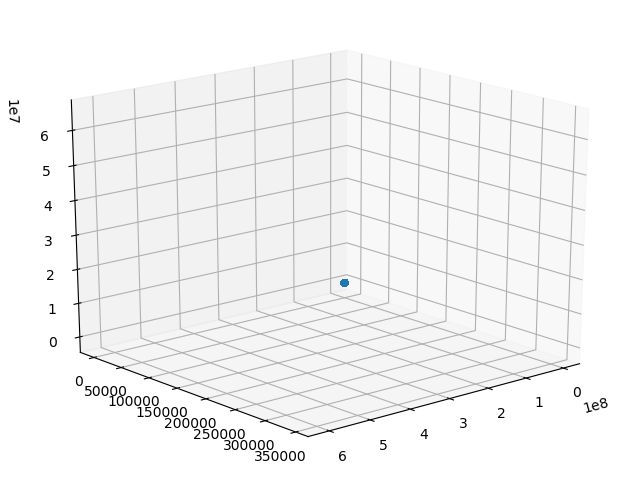

In [152]:
# position seems to plot position of a single point of the mri image
# notice three "branches" as the mri series traverses in a direction
%matplotlib notebook


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def convert_position_string(string):
    # convert from string to list of floats
    loc = map(float, string.strip('][').split(','))
    return loc

# sub sample for easier plotting

meta['image_position_x'], \
meta['image_position_y'], \
meta['image_position_z'] = zip(*meta.ImagePositionPatient.apply(convert_position_string))
sample = meta.sample(5000)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(sample['image_position_x'],
           sample['image_position_y'],
           sample['image_position_z'])

### Orientation

In [107]:
# could really use some rounding here.. 
meta.ImageOrientationPatient.sample(10)

164773    [-0.04875, 0.99836, 0.03014, -0.10189, 0.02505...
114697            [1, -2.051034e-10, 0, 2.051034e-10, 1, 0]
85944     [0.9999984769134, -0.0017453283007, 0, 0.00174...
296416    [0.037964, 0.999279, 0, -0.0102996, 0.00039130...
51467                                    [1, 0, 0, 0, 1, 0]
205304    [-0.0529698, 0.988957, 0.138414, -0.00451156, ...
123121    [0.9999984769134, -0.0017453283007, 0, 0.00174...
73639     [0.9999984769134, -0.0017453283007, 0, 0.00174...
306270                                 [1, -0, 0, -0, 1, 0]
36489     [0.0802236, 0.989835, 0.117434, -0.0416439, 0....
Name: ImageOrientationPatient, dtype: object

In [117]:
def get_image_plane(loc):
    # convert from string to list of floats
    loc = map(float, loc.strip('][').split(','))
    # round
    loc = map(round, loc)
    row_x, row_y, row_z, col_x, col_y, col_z = loc
    if row_x == 1 and row_y == 0 and col_x == 0 and col_y == 0:
        return "Coronal"
    elif row_x == 0 and row_y == 1 and col_x == 0 and col_y == 0:
        return "Sagittal"
    elif row_x == 1 and row_y == 0 and col_x == 0 and col_y == 1:
        return "Axial"
    else:
        return "Unknown"

meta['image_plane'] = meta.ImageOrientationPatient.apply(get_image_plane)
meta.image_plane.value_counts()

Axial       204682
Sagittal     87308
Coronal      56651
Name: image_plane, dtype: int64

In [116]:
# no clear trend between image type and orientation
pd.crosstab(meta.image_plane, meta.SeriesDescription)

SeriesDescription,FLAIR,T1w,T1wCE,T2w
image_plane,,,,
Axial,23336,75706,85547,20093
Coronal,45617,1105,6470,3459
Sagittal,5295,816,4749,76448


In [158]:
meta.ImagedNucleus.value_counts()

1H    344636
H1      2577
H        214
Name: ImagedNucleus, dtype: int64

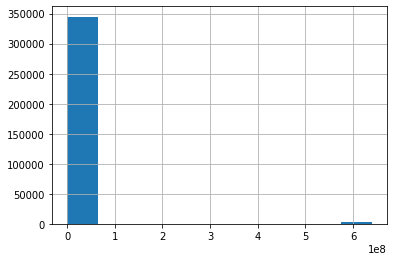

In [165]:
%matplotlib inline
meta.ImagingFrequency.hist()

In [167]:
meta.InPlanePhaseEncodingDirection.value_counts()

ROW    325277
COL      1331
Name: InPlanePhaseEncodingDirection, dtype: int64

In [197]:
# scale is in Tesla
# 3 tesla magnet should provide higher signal to noise ratio...
meta.MagneticFieldStrength.value_counts()

3.000000        323035
1.500000         20951
15000.000000      2577
1.493806           380
1.494000           190
1.494000            80
Name: MagneticFieldStrength, dtype: int64

In [198]:
meta.NumberOfAverages.value_counts()

1.000000    330885
2.000000     10188
0.750000      3162
0.500000      2070
3.000000       483
1.500000       275
0.947368       220
0.705488       120
1.200000        24
Name: NumberOfAverages, dtype: int64

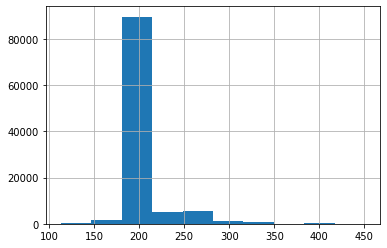

In [200]:
meta.NumberOfPhaseEncodingSteps.hist()

In [203]:
meta.TemporalResolution.head().value_counts()

Series([], Name: TemporalResolution, dtype: int64)

In [210]:
meta.SAR.value_counts()

0.870041    1082
0.260800     856
0.889446     856
0.247700     816
0.236700     808
1.012350     784
0.262400     768
0.194384     756
0.290700     752
0.362712     752
0.175326     720
0.160984     704
0.235706     704
0.200626     704
0.118071     680
0.984763     666
0.392800     664
0.339300     592
0.101763     592
0.239690     576
0.231155     576
0.348400     576
1.031050     545
0.518439     514
0.566216     513
0.547893     513
0.248741     501
1.061690     497
0.468168     496
0.142225     484
0.243646     481
0.246000     481
0.256595     465
0.239400     456
0.193300     456
0.727816     452
1.014130     450
0.973484     448
1.096870     448
0.229300     440
0.240600     440
0.221900     440
0.280800     440
0.242100     440
0.270400     440
0.254500     440
0.245000     432
0.475000     432
0.659139     432
0.344500     432
0.233300     432
0.235600     432
0.913285     432
0.208200     432
0.223300     432
0.685964     432
0.225700     432
0.228600     432
0.227900     4